### import libraries

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchsummary
import matplotlib.pyplot as plt
import preprocessing
import cnn
import network

### set device

In [4]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### set hyperparameters

In [5]:
#in_channels = 1    # 28x28 = 784, size of MNIST images (grayscale)
#hidden_size = 100
num_classes = 24 # 2 letters are missing "J" and "Z"
learning_rate = 0.001
batch_size = 64
num_epochs = 2

### pre-preprocessing and splitting Dataset (training, validation, test)

In [7]:
train = r'data/sign_mnist_train.csv'
test = r'data/sign_mnist_test.csv'
train_data, val_data, test_data = preprocessing.make_dataset(train_path=train, test_path=test)

### DataLoader

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

### Initialize network

In [9]:
# Create the network and look at it's text representation
#
# net = cnn.CNN().to(device)
#torchsummary.summary(net, (1, 28, 28))

net = network.network(in_channels=1, output_size=24, device=device)
torchsummary.summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 24, 24]           1,664
         LeakyReLU-2           [-1, 64, 24, 24]               0
         MaxPool2d-3           [-1, 64, 12, 12]               0
            Conv2d-4          [-1, 512, 10, 10]         295,424
         LeakyReLU-5          [-1, 512, 10, 10]               0
         MaxPool2d-6            [-1, 512, 5, 5]               0
           Flatten-7                [-1, 12800]               0
            Linear-8                  [-1, 256]       3,277,056
         LeakyReLU-9                  [-1, 256]               0
           Linear-10                   [-1, 24]           6,168
Total params: 3,580,312
Trainable params: 3,580,312
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.61
Params size (MB): 13.66
Estima

### train the model

In [10]:
trained_model, train_losses, valid_losses = cnn.train(
    train_loader=train_loader,
    valid_loader=valid_loader,
    model=net, 
    num_epochs=num_epochs, 
    learning_rate=learning_rate, 
    device=device
    )

Epoch: 1 	Training Loss: 0.998712 	Validation Loss: 0.218202
Epoch: 2 	Training Loss: 0.121702 	Validation Loss: 0.052718


### training vs. validation loss

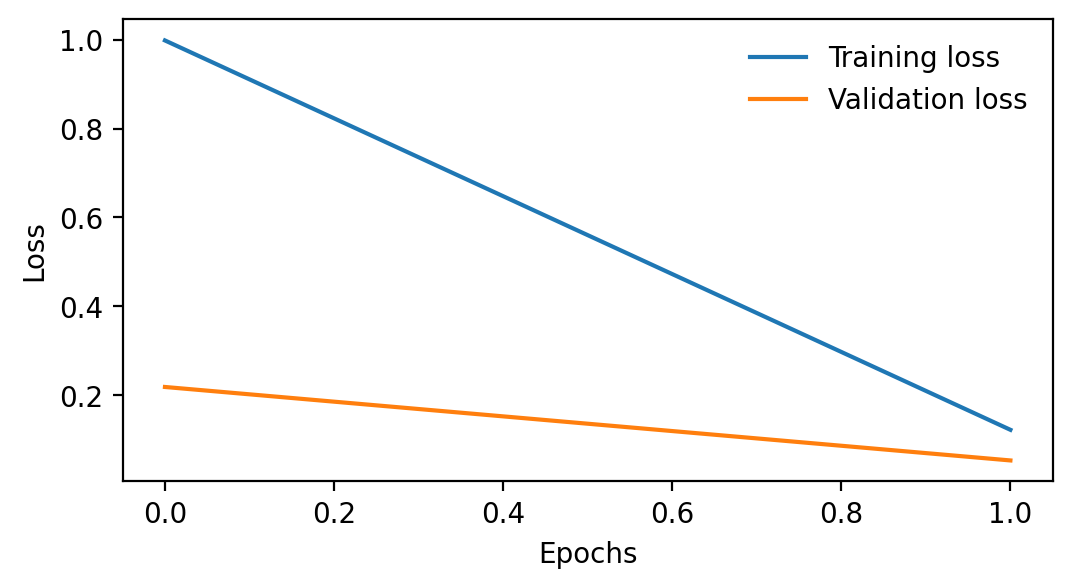

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(6,3))
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

### model performance

In [12]:
cnn.get_accuracy(loader=train_loader, model=trained_model, device=device)
cnn.get_accuracy(loader=valid_loader, model=trained_model, device=device)
cnn.get_accuracy(loader=test_loader, model=trained_model, device=device)

Correct: [19772 / 20000] with accuracy 98.86 %
Correct: [7356 / 7455] with accuracy 98.67 %
Correct: [6495 / 7172] with accuracy 90.56 %


### Save Model

In [17]:
# save model
PATH = 'output/cnn/model.pth'
torch.save(trained_model.state_dict(), PATH)
# reload model
#net = cnn.CNN().to(device)
#net.load_state_dict(torch.load(PATH))